**Model Training**

**Import Data and Required Packages**

In [9]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


**Import the CSV Data as Pandas DataFrame**

In [10]:
df = pd.read_csv(r'F:\DATA-SCIENCE\ML-Project\Notebook\Data\customer_churn_business_dataset.csv')

In [12]:
df.head()

,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,avg_resolution_time,complaint_type,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,churn
0,CUST_00001,Male,68,Bangladesh,London,SME,22,Web,Monthly,26,...,13.354360,Service,4.0,0,0.71,0.40,27,Satisfied,1,0
1,CUST_00002,Female,57,Canada,Sydney,Individual,9,Mobile,Monthly,7,...,25.140088,Billing,2.0,0,0.78,0.33,-19,Neutral,2,1
2,CUST_00003,Male,24,Germany,New York,SME,58,Web,Yearly,19,...,27.572928,Service,3.0,0,0.35,0.49,80,Neutral,1,0
3,CUST_00004,Male,49,Australia,Dhaka,Individual,19,Mobile,Yearly,34,...,26.420822,Technical,5.0,1,0.83,0.15,100,Neutral,0,0
4,CUST_00005,Male,65,Bangladesh,Delhi,Individual,52,Web,Monthly,20,...,26.674579,Technical,4.0,0,0.65,0.44,21,Unsatisfied,1,0


**Preparing X and Y Variables**

In [13]:
X = df.drop(columns=['churn'])
y = df['churn']


**Identify Categorical and Numerical Features**

In [18]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns
print('Numerical Features:', num_features)
print('Categorical Features:', cat_features)

Numerical Features: Index(['age', 'tenure_months', 'monthly_logins', 'weekly_active_days',
       'avg_session_time', 'features_used', 'usage_growth_rate',
       'last_login_days_ago', 'monthly_fee', 'total_revenue',
       'payment_failures', 'support_tickets', 'avg_resolution_time',
       'csat_score', 'escalations', 'email_open_rate', 'marketing_click_rate',
       'nps_score', 'referral_count'],
      dtype='object')
Categorical Features: Index(['customer_id', 'gender', 'country', 'city', 'customer_segment',
       'signup_channel', 'contract_type', 'payment_method', 'discount_applied',
       'price_increase_last_3m', 'complaint_type', 'survey_response'],
      dtype='object')


**Data Preprocessing**

In [19]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)


**Train–Test Split**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


**Create Evaluation Function**

In [21]:
def evaluate_model(true, predicted):
    acc = accuracy_score(true, predicted)
    prec = precision_score(true, predicted)
    rec = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    return acc, prec, rec, f1


**Models Dictionary**

In [24]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=False)
}


**Model Training & Evaluation**

In [25]:
model_list = []
accuracy_list = []

for model_name, model in models.items():
    
    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_acc, train_prec, train_rec, train_f1 = evaluate_model(y_train, y_train_pred)
    test_acc, test_prec, test_rec, test_f1 = evaluate_model(y_test, y_test_pred)
    
    print(model_name)
    print("Training Performance")
    print(f"Accuracy: {train_acc:.4f}")
    print(f"Precision: {train_prec:.4f}")
    print(f"Recall: {train_rec:.4f}")
    print(f"F1 Score: {train_f1:.4f}")
    
    print("----------------------------------")
    
    print("Test Performance")
    print(f"Accuracy: {test_acc:.4f}")
    print(f"Precision: {test_prec:.4f}")
    print(f"Recall: {test_rec:.4f}")
    print(f"F1 Score: {test_f1:.4f}")
    
    model_list.append(model_name)
    accuracy_list.append(test_acc)
    
    print("="*40)
    print()


Logistic Regression
Training Performance
Accuracy: 0.9034
Precision: 0.9583
Recall: 0.0563
F1 Score: 0.1064
----------------------------------
Test Performance
Accuracy: 0.8965
Precision: 0.2857
Recall: 0.0098
F1 Score: 0.0190

K-Neighbors Classifier
Training Performance
Accuracy: 0.9006
Precision: 0.6341
Recall: 0.0636
F1 Score: 0.1157
----------------------------------
Test Performance
Accuracy: 0.8910
Precision: 0.2083
Recall: 0.0245
F1 Score: 0.0439

Decision Tree
Training Performance
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
----------------------------------
Test Performance
Accuracy: 0.8640
Precision: 0.2821
Recall: 0.2157
F1 Score: 0.2444

Random Forest
Training Performance
Accuracy: 0.9999
Precision: 1.0000
Recall: 0.9988
F1 Score: 0.9994
----------------------------------
Test Performance
Accuracy: 0.8980
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

AdaBoost
Training Performance
Accuracy: 0.8974
Precision: 0.4938
Recall: 0.1934
F1 Score: 0.2779


**Handle Class Imbalance**

In [28]:
from imblearn.over_sampling import SMOTE


In [29]:
# Use Class Weight
LogisticRegression(class_weight='balanced')


LogisticRegression(class_weight='balanced')

In [30]:
# Despite high accuracy, both Logistic Regression and KNN classifiers exhibit very low recall, 
# indicating poor churn detection due to class imbalance, making them ineffective
# without further optimization.

**Model Comparison Results**

In [31]:
results_df = pd.DataFrame({
    'Model Name': model_list,
    'Accuracy': accuracy_list
}).sort_values(by='Accuracy', ascending=False)

results_df


,Model Name,Accuracy
3,Random Forest,0.8980
6,CatBoost,0.8980
0,Logistic Regression,0.8965
4,AdaBoost,0.8960
1,K-Neighbors Classifier,0.8910
5,XGBoost,0.8800
2,Decision Tree,0.8640


**Random Forest and CatBoost classifiers achieved the highest accuracy of 89.8%, making them the best-performing models; however, further evaluation using recall and F1-score is required due to class imbalance.**

**Best Model: Random Forest and CatBoost**

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced'
    ))
])

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f%%" % accuracy)


Accuracy of the model is 89.80%


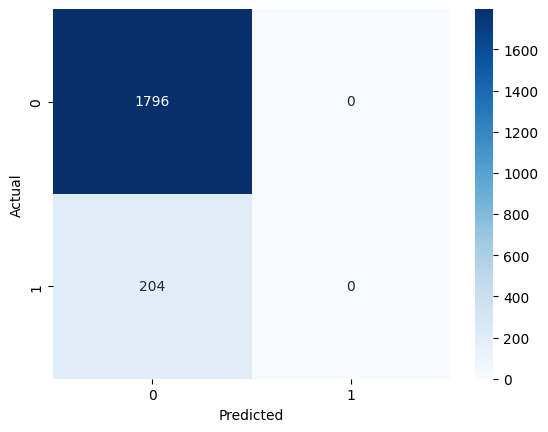

In [34]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [35]:
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred
})

pred_df.head()


,Actual Value,Predicted Value
5647,0,0
9504,0,0
8509,0,0
2130,0,0
3346,0,0


ROC-AUC Score: 0.7871672889645837


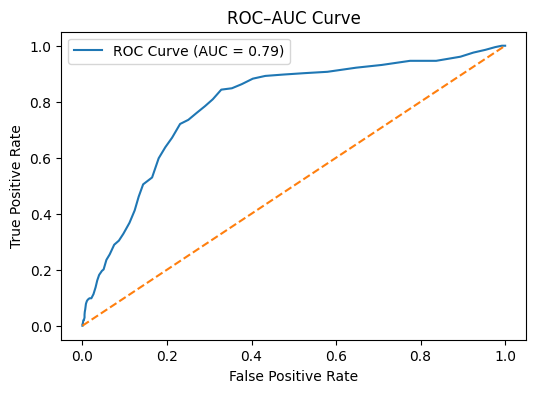

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities (IMPORTANT)
y_prob = best_model.predict_proba(X_test)[:, 1]

# ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", auc_score)

# Plot ROC Curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC–AUC Curve')
plt.legend()
plt.show()


The ROC–AUC curve indicates that the model has good discriminative ability with an AUC score of 0.79. This demonstrates that the model can effectively differentiate between churn and non-churn customers, making ROC–AUC a more reliable evaluation metric than accuracy for this imbalanced dataset.